In [141]:
"""
Importing libraries for data analysis and visualization
"""
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


"""
Importing libraries for machine learning model 
"""
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

"""
Hyperparameter tuning
"""
from sklearn.model_selection import GridSearchCV




In [142]:
"""
Read the dataset
"""

data = pd.read_csv("nba_games.csv")
data.head()


,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
0,2022-23,1610612744,GSW,Golden State Warriors,22201230,2023-04-09T00:00:00,GSW @ POR,W,48.0,58,...,1,1578,55,512,457,678,2455,3,1,1.0
1,2020-21,1610612749,MIL,Milwaukee Bucks,22000051,2020-12-29T00:00:00,MIL @ MIA,W,48.0,51,...,146,1636,33,1830,1361,1552,1220,14,7,1.0
2,2013-14,1610612751,BKN,Brooklyn Nets,21300359,2013-12-16T00:00:00,BKN vs. PHI,W,48.0,47,...,22,2280,406,1979,1,1004,453,19,12,1.0
3,2013-14,1610612757,POR,Portland Trail Blazers,21300347,2013-12-14T00:00:00,POR @ PHI,W,48.0,52,...,2,2065,628,204,1269,272,2190,4,15,1.0
4,2018-19,1610612745,HOU,Houston Rockets,21801200,2019-04-07T00:00:00,HOU vs. PHX,W,48.0,53,...,84,176,149,917,1,244,1725,4,20,1.0


In [143]:
"""
Copy dataset to avoid modifying the original dataset
"""
new_data = data.copy()

"""
Summary of the dataset
"""
new_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35678 entries, 0 to 35677
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_YEAR        35678 non-null  object 
 1   TEAM_ID            35678 non-null  int64  
 2   TEAM_ABBREVIATION  35678 non-null  object 
 3   TEAM_NAME          35678 non-null  object 
 4   GAME_ID            35678 non-null  int64  
 5   GAME_DATE          35678 non-null  object 
 6   MATCHUP            35678 non-null  object 
 7   WL                 35678 non-null  object 
 8   MIN                35678 non-null  float64
 9   FGM                35678 non-null  int64  
 10  FGA                35678 non-null  int64  
 11  FG_PCT             35678 non-null  float64
 12  FG3M               35678 non-null  int64  
 13  FG3A               35678 non-null  int64  
 14  FG3_PCT            35678 non-null  float64
 15  FTM                35678 non-null  int64  
 16  FTA                356

In [144]:
"""Check for duplicates"""
new_data.duplicated().sum()

0

In [145]:
"""
Drop useless features from dataset and convert WL to binary values
"""

new_data['WL'] = new_data['WL'].map({'W':1 , 'L':0})
print("Wins and Losses count in dataset:", new_data['WL'].value_counts())

drop_cols = ['SEASON_YEAR', 'TEAM_ID', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'TEAM_ABBREVIATION', 'PLUS_MINUS']
new_data = new_data.drop(drop_cols, axis=1)

new_data.head(23)







Wins and Losses count in dataset: WL
1    17839
0    17839
Name: count, dtype: int64


,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
0,1,48.0,58,96,0.604,27,49,0.551,14,16,...,1,1578,55,512,457,678,2455,3,1,1.0
1,1,48.0,51,92,0.554,29,51,0.569,13,15,...,146,1636,33,1830,1361,1552,1220,14,7,1.0
2,1,48.0,47,78,0.603,21,35,0.600,15,26,...,22,2280,406,1979,1,1004,453,19,12,1.0
3,1,48.0,52,93,0.559,21,37,0.568,14,20,...,2,2065,628,204,1269,272,2190,4,15,1.0
4,1,48.0,53,100,0.530,27,57,0.474,16,21,...,84,176,149,917,1,244,1725,4,20,1.0
5,1,48.0,46,91,0.505,23,40,0.575,25,35,...,9,112,1623,2035,1115,1974,154,2,28,1.0
6,1,48.0,54,93,0.581,21,33,0.636,5,7,...,29,1704,896,1979,195,2009,2446,10,33,1.0
7,1,48.0,46,92,0.500,24,55,0.436,8,11,...,22,1319,258,55,41,725,2222,166,45,1.0
8,1,48.0,52,95,0.547,26,44,0.591,12,18,...,5,689,772,1447,1008,1021,1627,15,62,1.0
9,1,48.0,53,88,0.602,20,36,0.556,4,7,...,1,825,919,549,191,686,2386,21,77,1.0


In [146]:
"""
Encode the features and build pipeline of training
"""


FEATURES = ['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'OREB', 'DREB']
TARGET = 'WL'



In [147]:
"""
Split data and train the model
"""

X = new_data[FEATURES]
y = new_data[TARGET]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)


# Set up parameters for the XGBoost model
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

model = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss'),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=2
)


model.fit(X_train, y_train)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=2)

In [148]:
"""
Predictions and eval model performance
"""

# Make predictions
y_pred = model.best_estimator_.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.8367
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3568
           1       0.83      0.84      0.84      3568

    accuracy                           0.84      7136
   macro avg       0.84      0.84      0.84      7136
weighted avg       0.84      0.84      0.84      7136



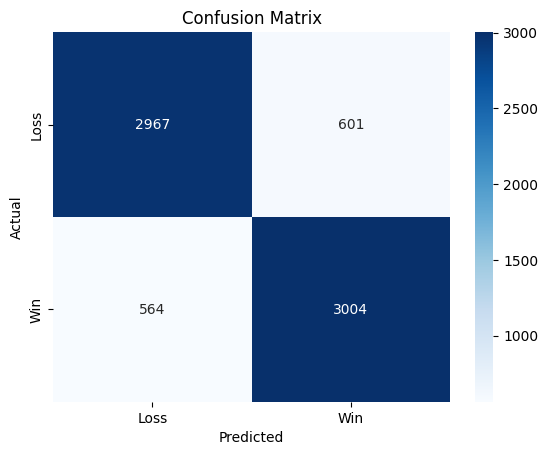

In [149]:
"""
Confusion Matrix
"""


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [150]:
"""
Save the model
"""

import joblib
joblib.dump(model, 'model.pkl')




['model.pkl']